Show Attention

In [1]:
import torch

def default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')   
    if torch.backends.mps.is_available():
        return torch.device('mps')
    return torch.device('cpu')

device = default_device()

In [2]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from matplotlib import ticker
import warnings
warnings.filterwarnings("ignore")

# 绘制注意力热图
def show_attention(axis, attention):
    fig = plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111)
    cax=ax.matshow(attention, cmap='bone')
    if axis is not None:
        ax.set_xticklabels(axis[0])
        ax.set_yticklabels(axis[1])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.show()

In [3]:
# 生成一个样例
sentence = ' I love deep learning more than machine learning'
tokens = sentence.split(' ')

attention_weights = torch.eye(8).reshape((8, 8)) + torch.randn((8, 8)) * 0.1  # 生成注意力权重矩阵
attention_weights

tensor([[ 0.9476, -0.0869, -0.0673, -0.0154, -0.0329, -0.0838,  0.0986, -0.0695],
        [-0.0545,  1.2550,  0.0411,  0.1282,  0.0203,  0.0776,  0.1155, -0.1128],
        [-0.0053,  0.0786,  1.0484, -0.0467, -0.1169,  0.0105, -0.0871, -0.0488],
        [-0.1845, -0.0265,  0.0438,  1.1863,  0.0536, -0.1261, -0.1368,  0.0889],
        [-0.0917, -0.0396,  0.0327,  0.0442,  1.0755, -0.0368,  0.1325, -0.0135],
        [-0.0677, -0.1642,  0.0623, -0.1155,  0.2685,  1.0606, -0.1668,  0.1451],
        [ 0.0362,  0.0637,  0.0136,  0.0369,  0.0973, -0.0787,  0.9615,  0.0080],
        [-0.0221,  0.0925,  0.0241, -0.1579, -0.1618, -0.1159, -0.0759,  1.1497]])

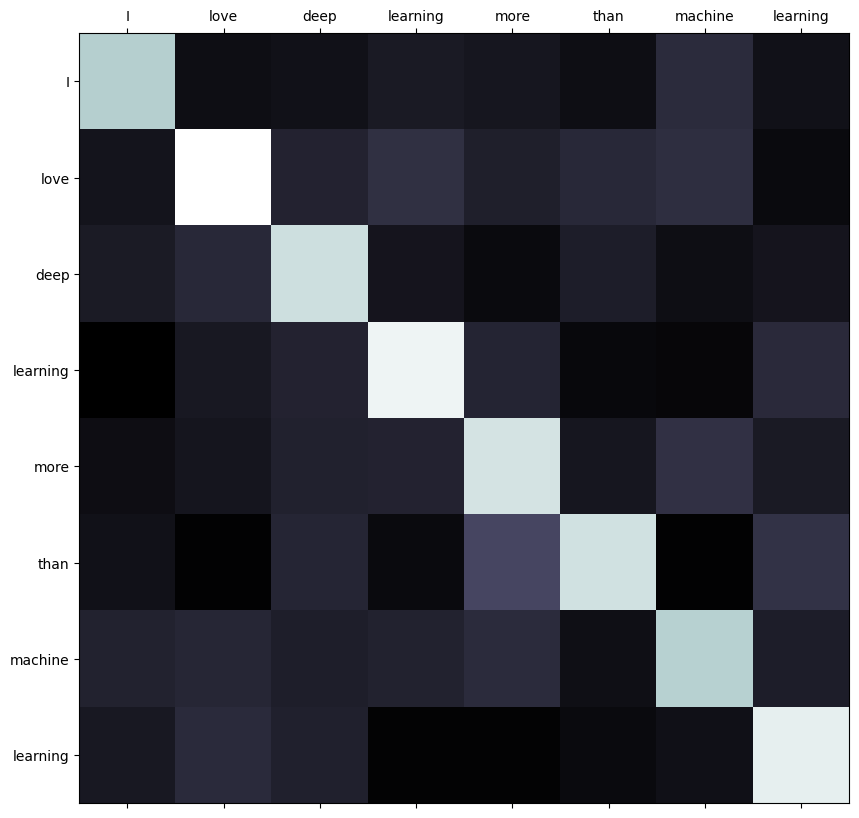

In [4]:
show_attention([tokens, tokens], attention_weights) 

In [5]:
# 定义一个映射函数
def func(x):
    return x + torch.sin(x)  # 映射函数 y = x + sin(x)

n = 100  # 样本个数100
x, _ = torch.sort(torch.rand(n) * 10)   # 生成0-10的随机样本并排序
y = func(x) + torch.normal(0.0, 1, (n,))  # 生成训练样本对应的y值， 增加均值为0，标准差为1的扰动
x, y

(tensor([0.0259, 0.1145, 0.1499, 0.1883, 0.4274, 0.5885, 0.8040, 1.1392, 1.1439,
         1.1682, 1.3009, 1.3642, 1.4888, 1.6385, 1.7788, 1.8676, 1.9855, 2.0609,
         2.0836, 2.0963, 2.1431, 2.3109, 2.3783, 2.3863, 2.4122, 2.5275, 2.5915,
         2.6049, 2.6721, 2.7202, 2.9966, 3.0881, 3.1131, 3.1216, 3.1778, 3.2899,
         3.3053, 3.4228, 3.4716, 3.5266, 3.5356, 3.6131, 3.7238, 3.8563, 4.0417,
         4.0498, 4.2537, 4.3345, 4.3355, 4.3910, 4.4378, 4.6569, 4.6720, 4.6948,
         4.8347, 5.1463, 5.2202, 5.4020, 5.4772, 5.5353, 5.8128, 5.8456, 5.8931,
         6.0225, 6.0328, 6.0624, 6.0732, 6.2057, 6.2145, 6.4432, 6.4680, 6.5689,
         6.6732, 6.7782, 6.8395, 6.9206, 7.1805, 7.3311, 7.5181, 7.5344, 7.6348,
         7.7285, 7.7522, 7.8423, 8.0422, 8.1888, 8.2362, 8.2757, 8.3030, 8.4807,
         8.7219, 8.8367, 8.8524, 8.9124, 8.9481, 9.4998, 9.5032, 9.7595, 9.7757,
         9.8530]),
 tensor([ 0.1596,  0.3516, -0.7436, -0.6479,  0.8360,  0.7466,  0.7327,  1.3848,
         

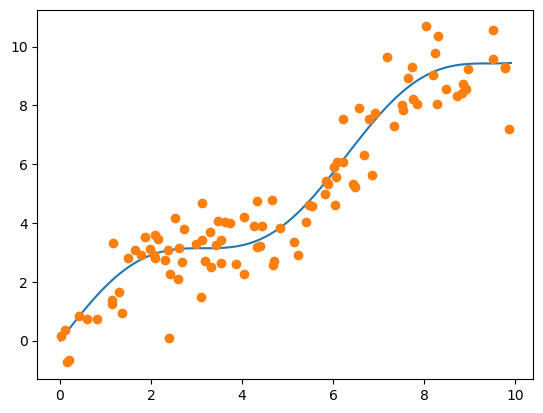

In [6]:
# 绘制曲线上的点
x_curve = torch.arange(0, 10, 0.1)  
y_curve = func(x_curve)
plt.plot(x_curve, y_curve)
plt.plot(x, y, 'o')
plt.show()

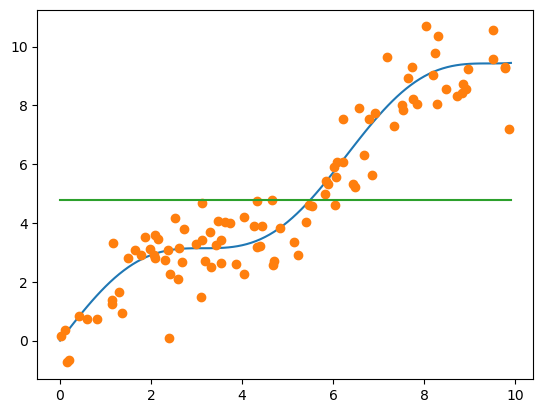

In [7]:
# 平均池化
y_hat = torch.repeat_interleave(y.mean(), n) # 将y_train中的元素进行复制，输入张量为y.mean, 重复次数为n
plt.plot(x_curve, y_curve)
plt.plot(x, y, 'o')
plt.plot(x_curve, y_hat)
plt.show()

In [8]:
# nadaraya-watson 核回归
x_nw = x_curve.repeat_interleave(n).reshape((-1, n))
x_nw.shape, x_nw

(torch.Size([100, 100]),
 tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.1000, 0.1000, 0.1000,  ..., 0.1000, 0.1000, 0.1000],
         [0.2000, 0.2000, 0.2000,  ..., 0.2000, 0.2000, 0.2000],
         ...,
         [9.7000, 9.7000, 9.7000,  ..., 9.7000, 9.7000, 9.7000],
         [9.8000, 9.8000, 9.8000,  ..., 9.8000, 9.8000, 9.8000],
         [9.9000, 9.9000, 9.9000,  ..., 9.9000, 9.9000, 9.9000]]))

In [9]:
# 带入公式得到注意力权重矩阵
attention_weights = nn.functional.softmax(-(x_nw - x)**2 / 2, dim=1)
attention_weights.shape, attention_weights

(torch.Size([100, 100]),
 tensor([[9.2250e-02, 9.1678e-02, 9.1250e-02,  ..., 1.9153e-22, 1.6355e-22,
          7.6549e-23],
         [8.5021e-02, 8.5246e-02, 8.5149e-02,  ..., 4.6723e-22, 3.9960e-22,
          1.8849e-22],
         [7.7931e-02, 7.8832e-02, 7.9021e-02,  ..., 1.1335e-21, 9.7104e-22,
          4.6159e-22],
         ...,
         [4.1252e-22, 9.6784e-22, 1.3577e-21,  ..., 8.6495e-02, 8.6400e-02,
          8.5639e-02],
         [1.6785e-22, 3.9730e-22, 5.5933e-22,  ..., 9.3151e-02, 9.3200e-02,
          9.3096e-02],
         [6.7969e-23, 1.6232e-22, 2.2933e-22,  ..., 9.9841e-02, 1.0005e-01,
          1.0072e-01]]))

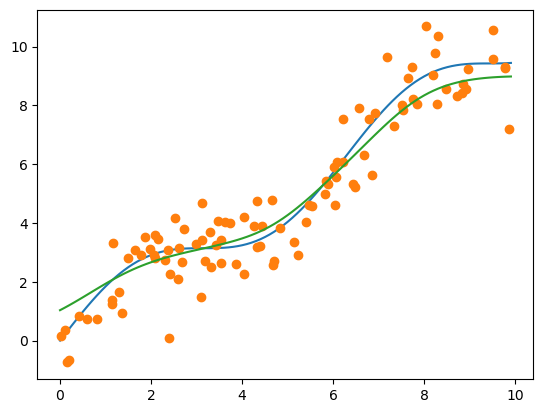

In [10]:
# y_hat为注意力权重和y值的乘积，是加权平均值
y_hat = torch.matmul(attention_weights, y)
plt.plot(x_curve, y_curve)
plt.plot(x, y, 'o')
plt.plot(x_curve, y_hat)
plt.show()

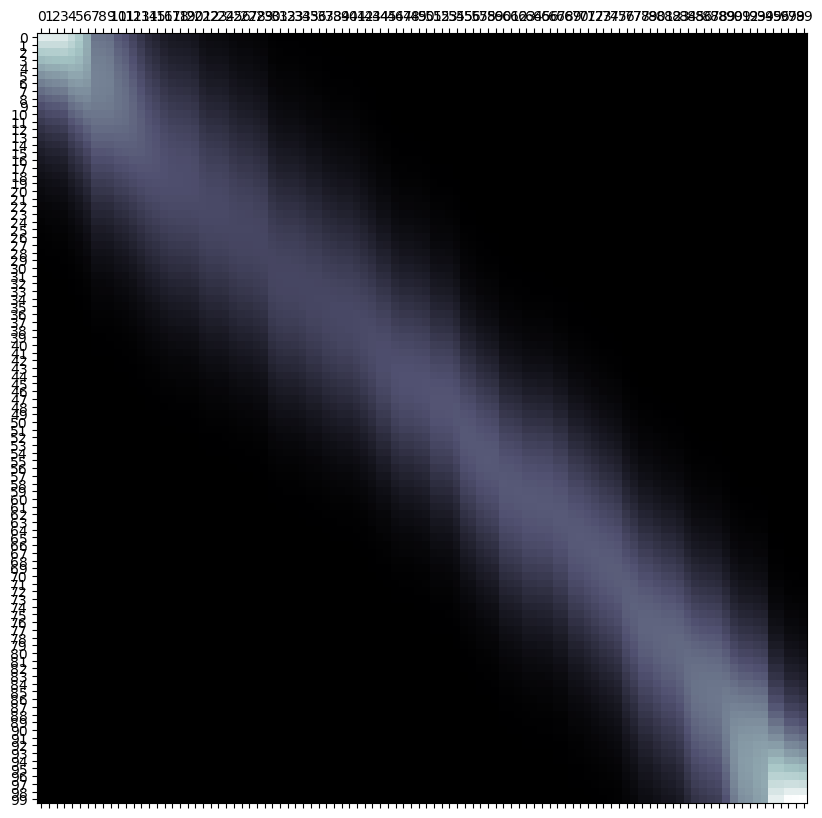

In [11]:
show_attention(None, attention_weights) # 展示注意力热图